# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [252]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob
import json
from bs4 import BeautifulSoup
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [178]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2239,667937095915278337,NaN,NaN,2015-11-21 05:26:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667937095...,3,10,None,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [179]:
url_r = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url_r)
if r.status_code == 200:
    with open(os.path.join('', f'{url_r.split("/")[-1]}'), 'wb') as file:
        file.write(r.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [180]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# df_1 = pd.read_csv('twitter-archive-enhanced.csv')
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [181]:
url_tweet = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
if requests.get(url_tweet).status_code == 200:
    with open(os.path.join('', f'{url_tweet.split("/")[-1]}'), 'wb') as file:
        file.write(requests.get(url_tweet).content)

In [182]:
# creating dataframe
df_list = []
with open('tweet-json.txt', encoding = 'utf-8') as file: 
    for i in file:
        i = json.loads(i)
        tweet_id = i['id']
        retweet_count = i['retweet_count']
        favorite_count = i['favorite_count']
        df_list.append({
            'tweet_id' : tweet_id,
            'retweet_count' : retweet_count,
            'favorite_count' : favorite_count
        })

In [183]:
df_2 = pd.DataFrame(df_list)
df_2.sample()

,favorite_count,retweet_count,tweet_id
570,9141,2391,801538201127157760


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [184]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [185]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [186]:
df_1.retweeted_status_id.isna().sum(), df_1.retweeted_status_user_id.isna().sum(), df_1.retweeted_status_timestamp.isna().sum()

(2175, 2175, 2175)

In [187]:
df_1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [188]:
df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [189]:
df_1.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Penny       10
Tucker      10
Lola        10
Bo           9
Winston      9
Sadie        8
the          8
Bailey       7
Buddy        7
Daisy        7
Toby         7
an           7
Bella        6
Rusty        6
Milo         6
Leo          6
Jax          6
Stanley      6
Dave         6
Scout        6
Koda         6
Oscar        6
Jack         6
Alfie        5
          ... 
Trevith      1
Murphy       1
Socks        1
Stewie       1
Harry        1
Dunkin       1
Ed           1
Barclay      1
Sweet        1
Carbon       1
Rhino        1
Amber        1
Nugget       1
Bubba        1
Maisey       1
Colin        1
Marvin       1
Sora         1
Billl        1
Huxley       1
Tessa        1
Crumpet      1
Ralphé       1
Iggy         1
Grey         1
Bert         1
Autumn       1
Jockson      1
Amélie       1
Frönq        1
Name: name, Length: 957, dtype: int64

In [190]:
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [191]:
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [192]:
df_2.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [193]:
df_2.duplicated().sum()

0

In [194]:
df_2.isnull().sum(), df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


(favorite_count    0
 retweet_count     0
 tweet_id          0
 dtype: int64, None)

### Quality issues
1. We only want original ratings (no retweets) that have images.
2. timestamp column, change dtype to to_date and delete +0000 in the end.

3. Some names are not mentioned in a tweet, so the values should be 'None', but in our case we still have some idefinite articles or different words that where picked right after "This is" beginig of the tweet. All the names starting with capital letter, all the rest garbage data starts with lowercase words. We'll replace lowercase words with 'None'.

4. text column, in the end of the text every post has a broken link, because of quotation symbol. Remove quotation symbol.

5. in_reply_to_status_id column, dtype change to integer.

6. in_reply_to_user_id column, dtype change to integer.

7. rating_numerator column, some values > 14, since 14 is the max rating given by author we should fix it.

8. source column, get information inside the tags and remove tags.

### Tidiness issues
1. column names 'doggo' , 'floofer', 'pupper', 'puppo' should be values for one column ex. "dog_stage"

2. link in the end of 'text' column values should be in separate column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [195]:
#copying data
df_clean = df_1.copy()


### Issue #1:

#### Define: We only want original ratings (no retweets) that have images. So we will filter our data: with checking 'text' column for containing any links  and 'retweeted_status_id' columns should be NaN. Columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' are connect, so filtering one would filter others out too.

#### Code

In [196]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
contains_link = df_clean.text.str.contains(url_pattern, case=False, na=False)
df_clean = df_clean[contains_link & df_clean['retweeted_status_id'].isna()]

#### Test

In [197]:
df_clean.retweeted_status_id.isna().mean(), df_clean.retweeted_status_user_id.isna().mean(), df_clean.retweeted_status_timestamp.isna().mean(), df_clean.text.str.contains(url_pattern, case=False, na=False).mean()

(1.0, 1.0, 1.0, 1.0)

In [198]:
# since we don't need 'retweeted_status_id', 'retweeted_status_user_id',';retweeted_status_timestamp', lets remove them from our df_clean data.
df_clean = df_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

### Issue #2:

#### Define: In 'timestamp' column, we should change dtype to a proper Date format and delete '+0000' in the end of time. First clean, then change.

#### Code

In [199]:
# Making sure all values have same +0000 in the end
test = False
for i in df_clean.timestamp:
    if i[:-6] == ' +0000':
        test = True
print(test)

False


In [200]:
df_clean.timestamp = [i[:-6] for i in df_clean.timestamp]
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

#### Test

In [201]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 248.1+ KB


In [202]:
df_clean.timestamp.sample()

2250   2015-11-20 22:30:44
Name: timestamp, dtype: datetime64[ns]

### Issue #3:

#### Define: Some names are not mentioned in a tweet, so the values should be 'None', but in our case we still have some idefinite articles or different words that where picked right after "This is" beginig of the tweet. All the names starting with capital letter, all the rest garbage data starts with lowercase words. We'll replace lowercase words with 'None'.

#### Code

In [203]:
df_clean.loc[df_clean.name.str.islower(), ['name']]  = 'None'

#### Test

In [204]:
df_clean.name.str.match('^[A-Z]').mean()

1.0

In [205]:
df_clean.name.value_counts()

None         726
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Lola           8
Sadie          8
Winston        8
Toby           7
Daisy          7
Bella          6
Oscar          6
Stanley        6
Jax            6
Bailey         6
Koda           6
Bo             6
Louis          5
Dave           5
Rusty          5
Leo            5
Milo           5
Scout          5
Chester        5
Buddy          5
Bentley        5
Alfie          4
Reggie         4
            ... 
Torque         1
Rodney         1
Striker        1
General        1
Bronte         1
Crumpet        1
Tessa          1
Sweet          1
Herb           1
Filup          1
Fwed           1
Leonidas       1
Kingsley       1
Naphaniel      1
Livvie         1
Eazy           1
Obi            1
Wiggles        1
Carbon         1
Sora           1
Terrance       1
Lilly          1
Rhino          1
Amber          1
Nugget         1
Bubba          1
Maisey         1
Colin         

### Issue #4:

#### Define: 'text' column in the end of the text, every post has a broken link, because of quotation symbol. Remove quotation symbol.

#### Code

In [206]:
df_clean.text.head()[0]
df_text_link = [i[-1] for i in df_clean.text.str.split(' ')]
df_clean.text = [i[:-1] for i in df_clean.text.str.split(' ')]

In [207]:
comb_text = [' '.join(i) for i in df_clean.text]
df_clean.drop('text', axis = 1)
df_clean['text'] = comb_text

#### Test

In [208]:
df_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"

### Issue #5:

#### Define: 'in_reply_to_status_id' column, we need to change data type to integer, since we're dealing with id number and they should be integers, not floats. We use .fillna(0) to replace any NaN values in the 'in_reply_to_status_id' column with 0 before converting to int. This is necessary because NaN values cannot be directly converted to integers.

#### Code:

In [209]:
df_clean['in_reply_to_status_id'] = [0 if i == 'None' else i for i in df_clean['in_reply_to_status_id']]
df_clean['in_reply_to_status_id'] = df_clean['in_reply_to_status_id'].fillna(0).astype(int)

#### Test:

In [210]:
df_clean['in_reply_to_status_id'].value_counts()

0                     2094
667152164079423488       2
674999807681908736       1
692041934689402880       1
684481074559381504       1
667806454573760512       1
733109485275860992       1
691416866452082688       1
670668383499735040       1
675349384339542016       1
674752233200820224       1
671561002136281088       1
759099523532779520       1
703041949650034688       1
671729906628341760       1
703255935813287936       1
675707330206547968       1
746885919387574272       1
674793399141146624       1
675497103322386432       1
684222868335505408       1
855818117272018944       1
729113531270991872       1
Name: in_reply_to_status_id, dtype: int64

### Issue #6:

#### Define: 'in_reply_to_user_id' column, we need to change data type to integer, since we're dealing with id number and they should be integers, not floats. We use .fillna(0) to replace any NaN values in the 'in_reply_to_user_id' column with 0 before converting to int. This is necessary because NaN values cannot be directly converted to integers.

#### Code:

In [211]:
df_clean['in_reply_to_user_id'] = [0 if i == 'None' else i for i in df_clean['in_reply_to_user_id']]
df_clean['in_reply_to_user_id'] = df_clean['in_reply_to_user_id'].fillna(0).astype(int)

#### Test:

In [212]:
df_clean['in_reply_to_user_id'].value_counts()

0             2094
4196983835      23
Name: in_reply_to_user_id, dtype: int64

### Issue #7:

#### Define: rating_numerator column, some values > 14, WeRateDogs gives max rating of 14. We need to fix this. Since rating_denominator is constant 10,  we can remove this column for furthen analysis. 'text' column will help with getting the right rating.

#### Code:

#### Some values are much larger than 10 like: 70, 150, 90 etc. If you look into 'text' column well see that author in fact was trying to be creative and show the rating in  equal proportions to denominator as 100%, like: 84/70 is 12/10, 165/150 is 11/10 etc. which shows that 'rating_denominator' is always 10 and should be removed from our table. Accordingly we can change our rating_numerator values to a proper proportion taking rating_denominator as a 10.

In [213]:
df_clean.rating_denominator = 10
#removing rating_denominator
df_clean = df_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text','expanded_urls', 'rating_numerator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

In [214]:
# checking rating_numerator values
df_clean.rating_numerator.value_counts()

12      489
10      436
11      417
13      295
9       154
8        98
7        52
14       40
5        34
6        32
3        19
4        16
2         9
1         5
0         2
60        1
24        1
26        1
44        1
50        1
165       1
80        1
84        1
88        1
143       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
121       1
144       1
Name: rating_numerator, dtype: int64

In [215]:
df_clean.rating_numerator = [np.nan if i == 'None' else i for i in df_clean['rating_numerator']]

In [216]:
rating_num_filtered = df_clean.query('rating_numerator > 14')
list(rating_num_filtered.text)

['The floofs have been released I repeat the floofs have been released. 84/70',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back",
 'Why does this never happen at my front door... 165/150',
 "This is Atticus. He's quite simply America af. 1776/10",
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once',
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10',
 "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody",
 "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80",
 'From left to right:\nCletus, Jerome,

In [217]:
strings = list(rating_num_filtered.text)

numerators = []
denominators = []

for text in strings:
    # Use regular expressions to find numerator and denominator patterns
    import re
    pattern = r'(\d+\.\d+|\d+)/(\d+)'
    match = re.search(pattern, text)
    
    if match:
        numerator_str, denominator_str = match.groups()
        
        # Check if the string contains "50/50" or "24/7"
        if numerator_str == "50" and denominator_str == "50" or numerator_str == "24" and denominator_str == "7":
            numerators.append(0.0)
            denominators.append(0)
        else:
            numerators.append(float(numerator_str))
            denominators.append(int(denominator_str))
    else:
        # If no match is found, append 0s
        numerators.append(0.0)
        denominators.append(0)

In [218]:
correct_rating_num = []

# Iterate through numerators and denominators and calculate the correct_rating_num
for numerator, denominator in zip(numerators, denominators):
    if denominator == 0:
        correct_rating_num.append(0)  # or any default value you prefer
    else:
        correct_rating_num.append(int((numerator / denominator) * 100 / 10))

correct_rating_num

[12, 0, 9, 11, 11, 1776, 12, 0, 11, 10, 9, 12, 11, 11, 11, 11, 12, 11, 420]

In [219]:
rating_num_filtered = df_clean['rating_numerator'] > 14
df_clean.loc[rating_num_filtered, 'rating_numerator'] = correct_rating_num

#### Test:

In [220]:
df_clean.rating_numerator.value_counts()

12      493
10      437
11      425
13      295
9       156
8        98
7        52
14       40
5        34
6        32
3        19
4        16
2         9
1         5
0         4
1776      1
420       1
Name: rating_numerator, dtype: int64

### Issue #8:

#### Define: 'source' column is html <a tag with text inside. We need to get only information inside of the tag.

#### Code:

In [221]:
df_clean['source'] = list(BeautifulSoup(i, 'lxml').a.text for i in df_clean['source'])

#### Test:

In [222]:
df_clean.source.value_counts()

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### Tidiness

### Issue #1:

#### Define: column names 'doggo' , 'floofer', 'pupper', 'puppo' should be values for one column "dog_stage". To make it tidier, we want to have each variable as a column and each observation (tweet) as a row, following the principles of tidy data.

#### Code:

In [223]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

In [227]:
# Melt the dataframe on the dog stages
df_melted = pd.melt(df_clean, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator', 'name'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name='dog_stage', value_name='stage_value')

df_melted = df_melted[df_melted['stage_value'] != 'None']
df_melted.drop('dog_stage', axis = 1, inplace = True)

# Merge the melted dataframe back with the original dataframe on 'tweet_id' and filling NA values.
df_clean = pd.merge(df_clean, df_melted[['tweet_id', 'stage_value']], on='tweet_id', how='left')
df_clean.stage_value.fillna('None', inplace = True)

# Drop original dog stage columns
df_clean.drop(['doggo','floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

# If there are any duplicated 'tweet_id's due to multiple dog stages
df_clean.drop_duplicates(subset='tweet_id', keep='first', inplace = True)

#### Test:

In [230]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage_value
0,892420643555336193,0,0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None
1,892177421306343426,0,0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None
2,891815181378084864,0,0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None
3,891689557279858688,0,0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None
4,891327558926688256,0,0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None


### Issue #2:

#### Define: In Quality Issue #4 in the end of the 'text' column values we removed broken link and put into separate value, now we're creating a new column to store those links for each tweet.

#### Code:

In [231]:
df_clean['text_link'] = df_text_link

#### Test:

In [232]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2128
Data columns (total 11 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    2117 non-null int64
in_reply_to_user_id      2117 non-null int64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
name                     2117 non-null object
stage_value              2117 non-null object
text_link                2117 non-null object
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 198.5+ KB


In [233]:
df_clean.text_link.sample()

1927    https://t.co/NvKJRYDosA
Name: text_link, dtype: object

In [235]:
df_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage_value,text_link
2124,666049248165822465,0,0,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,None,None,https://t.co/4B7cOc1EDq
2125,666044226329800704,0,0,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,None,None,https://t.co/DWnyCjf2mx
2126,666033412701032449,0,0,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,None,None,https://t.co/y671yMhoiR
2127,666029285002620928,0,0,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,None,None,https://t.co/r7mOb2m0UI
2128,666020888022790149,0,0,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,None,None,https://t.co/BLDqew2Ijj


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [239]:
df_clean.reset_index()
df_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

1. Tweet Source Distribution:
You can analyze from which device or application the majority of the tweets are made. For example, you can count how many tweets are from "Twitter for iPhone" vs other sources.

2. Tweet Posting Patterns:
We can analyze the dataset to understand if there's any pattern or trend in terms of when these dog tweets were posted. Are there specific months or days of the week when more tweets were posted? This can provide insight into user engagement patterns.

3. Frequency of Dog Names:
Analyzing the name column can provide insights into the most popular or commonly tweeted dog names in this dataset.

In [240]:
# Insight 1: Tweet Source Distribution
print(df_clean['source'].value_counts())

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64


In [246]:
# Insight 2: Tweet Posting Patterns by Month
monthly_tweets = df_clean['timestamp'].dt.month.value_counts().sort_index()
print(monthly_tweets)

1     255
2     190
3     187
4     103
5     104
6     140
7     147
8      63
9      69
10     71
11    352
12    436
Name: timestamp, dtype: int64


In [245]:
# Insight 3: Frequency of Dog Names
top_names = df_clean['name'].value_counts().head(11)
print(top_names[1:])

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Lola        8
Sadie       8
Winston     8
Toby        7
Name: name, dtype: int64


### Visualization

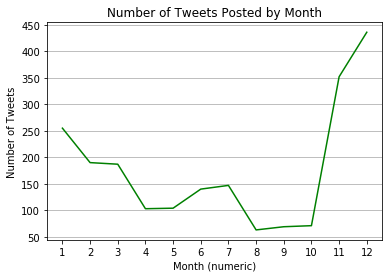

In [254]:
monthly_tweets.plot(kind='line', marker='o', color='green')
plt.title('Number of Tweets Posted by Month')
plt.xlabel('Month (numeric)')
plt.ylabel('Number of Tweets')
plt.grid(True, axis='y')
plt.xticks(list(range(1, 13)))
plt.show()